In [1]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import progressbar
from scipy import stats
sns.set()

%matplotlib inline

# Define path and load files 

Accross the analysis the following names are used for the 3 screens
- ova == Ovariole Number screen
- fec == Hippo RNAi EggLaying screen
- xRNAi == EggLaying screen

In [2]:
data = "../../../Paper/Data"
resultpath = '../../../Paper/Results'

In [3]:
G = nx.read_graphml(os.path.join(data,'PPI.graphml'))
hipo_ova = pd.read_csv(os.path.join(data,'Screen/hipo_ova_clean.csv'))
xRNAi_fec = pd.read_csv(os.path.join(data,'Screen/xRNAi_fec_clean.csv'))
hipo_fec = pd.read_csv(os.path.join(data,'Screen/hipo_fec_clean.csv'))
signaling = pd.read_csv(os.path.join(data,'signaling.csv'))
connectors= pd.read_csv(os.path.join(resultpath,"ConnectorGeneList.csv"))

In [4]:
mean_ova_gene = hipo_ova.groupby('FbID', as_index=False).mean()
# We only consider the sum of eggs layed over 5 days, so we restrict the data to the "Sum"
mean_fec_gene = hipo_fec[hipo_fec['Condition'] == 'Sum'].reset_index(drop=True).groupby('FbID', as_index=False).mean()
mean_xRNAi_gene = xRNAi_fec[xRNAi_fec['Condition'] == 'Sum'].reset_index(drop=True).groupby('FbID', as_index=False).mean()

In [5]:
# Modules computed in the notebook file: Seed-Connector
ova_module_G = nx.read_graphml(os.path.join(resultpath,'Ova_module.graphml'))
fec_module_G = nx.read_graphml(os.path.join(resultpath,'Hpo_EggL_module.graphml'))
xRNAi_module_G = nx.read_graphml(os.path.join(resultpath,'EggL_module.graphml'))
core_module_G = nx.read_graphml(os.path.join(resultpath,'Core_module.graphml'))

In [6]:
ova_module = ova_module_G.nodes()
fec_module = fec_module_G.nodes()
xRNAi_module = xRNAi_module_G.nodes()
core_module = core_module_G.nodes()

In [7]:
# We redefine our threshold of 2 and 5 for Z score cutoff
ova_threshold = 2
eggl_threshold = 5

# Scatter plots of the 3 screens against each other

In [8]:
commongenes = set.intersection(set(mean_ova_gene['FbID'].unique()), set(mean_fec_gene['FbID'].unique()))

In [9]:
gray = "#AAAAAA"
green = "#77cc77"

## Screen scatter plots V2

In [51]:
# Make a temporary dataframe to plot with
tmpdata = mean_fec_gene[mean_fec_gene['FbID'].isin(commongenes)]
tmpdata = tmpdata.merge(mean_ova_gene[mean_ova_gene['FbID'].isin(commongenes)], on='FbID')
tmpdata = tmpdata.merge(mean_xRNAi_gene[mean_xRNAi_gene['FbID'].isin(commongenes)], on='FbID')

tmpdata = tmpdata.rename(columns={"Z_x":"Z_fec", "Z_y":"Z_ova", "Z":"Z_xRNAi"})

In [52]:
X = "Z_fec"
Y = "Z_ova"

In [53]:
tmpdata['Color'] = (tmpdata[Y].abs() > ova_threshold) | (tmpdata[X].abs() > eggl_threshold)
tmpdata['Type'] = np.where(tmpdata['Color'], "Postive",  "Negative")
tmpdata['Color'] = np.where(tmpdata['Color'], green,  gray)

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


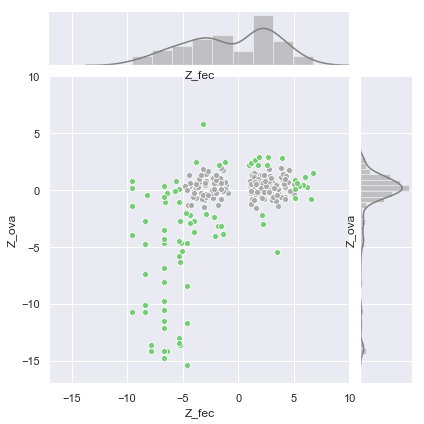

In [54]:
g = sns.JointGrid(x=tmpdata[tmpdata['Type'] == "Negative"][X], y=tmpdata[tmpdata['Type'] == "Negative"][Y], xlim=(-17,10), ylim=(-17,10))
g = g.plot_joint(sns.scatterplot, color="#AAAAAA")
g.x = tmpdata[tmpdata['Type'] == "Postive"][X]
g.y = tmpdata[tmpdata['Type'] == "Postive"][Y]
g = g.plot_joint(sns.scatterplot, color="#77cc77")
g.x = tmpdata[X]
g.y = tmpdata[Y]
g = g.plot_marginals(sns.distplot, kde=True, color=".5")
g.savefig(os.path.join(resultpath,"Figures/Scatter_Ova_VS_Fec_new.svg"))

In [55]:
X = "Z_xRNAi"
Y = "Z_ova"

In [56]:
tmpdata['Color'] = (tmpdata[Y].abs() > ova_threshold) | (tmpdata[X].abs() > eggl_threshold)
tmpdata['Type'] = np.where(tmpdata['Color'], "Postive",  "Negative")
tmpdata['Color'] = np.where(tmpdata['Color'], green,  gray)

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


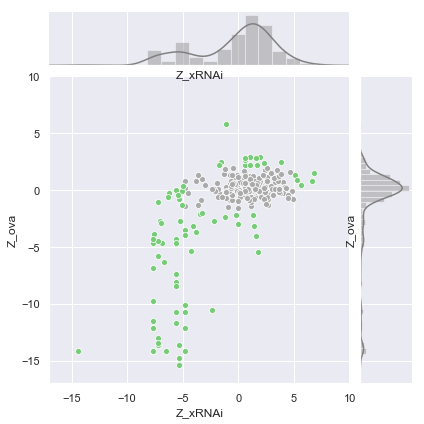

In [57]:
g = sns.JointGrid(x=tmpdata[tmpdata['Type'] == "Negative"][X], y=tmpdata[tmpdata['Type'] == "Negative"][Y], xlim=(-17,10), ylim=(-17,10))
g = g.plot_joint(sns.scatterplot, color="#AAAAAA")
g.x = tmpdata[tmpdata['Type'] == "Postive"][X]
g.y = tmpdata[tmpdata['Type'] == "Postive"][Y]
g = g.plot_joint(sns.scatterplot, color="#77cc77")
g.x = tmpdata[X]
g.y = tmpdata[Y]
g = g.plot_marginals(sns.distplot, kde=True, color=".5")
g.savefig(os.path.join(resultpath,"Figures/Scatter_Ova_VS_xRNAi_new.svg"))

In [58]:
X = "Z_fec"
Y = "Z_xRNAi"

In [59]:
tmpdata['Color'] = (tmpdata[Y].abs() > ova_threshold) | (tmpdata[X].abs() > eggl_threshold)
tmpdata['Type'] = np.where(tmpdata['Color'], "Postive",  "Negative")
tmpdata['Color'] = np.where(tmpdata['Color'], green,  gray)

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


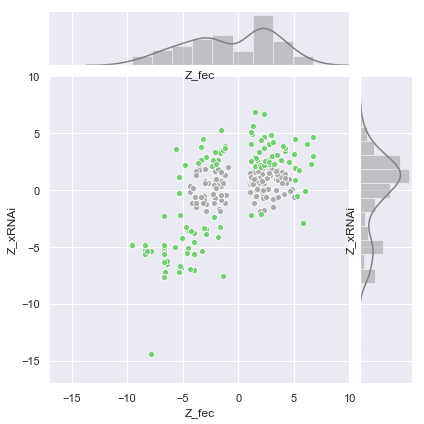

In [60]:
g = sns.JointGrid(x=tmpdata[tmpdata['Type'] == "Negative"][X], y=tmpdata[tmpdata['Type'] == "Negative"][Y], xlim=(-17,10), ylim=(-17,10))
g = g.plot_joint(sns.scatterplot, color="#AAAAAA")
g.x = tmpdata[tmpdata['Type'] == "Postive"][X]
g.y = tmpdata[tmpdata['Type'] == "Postive"][Y]
g = g.plot_joint(sns.scatterplot, color="#77cc77")
g.x = tmpdata[X]
g.y = tmpdata[Y]
g = g.plot_marginals(sns.distplot, kde=True, color=".5")
g.savefig(os.path.join(resultpath,"Figures/Scatter_Fec_VS_xRNAi_new.svg"))

## Ovariole nb against Egg Laying (Hippo RNAi for both)

In [61]:
# # # Set X as Ovariole Number
X = mean_fec_gene[mean_fec_gene['FbID'].isin(commongenes)]['Z'].values
# # # Set Y as Hippo RNAi EggLaying
Y = mean_ova_gene[mean_ova_gene['FbID'].isin(commongenes)]['Z'].values

In [62]:
# Let's create the color set Gray if under threshold, or blue if over threshold
c = []
for i in range(len(X)):
    tmpc = gray
    if np.abs(X[i]) >= eggl_threshold:
        tmpc = green
    if np.abs(Y[i]) >= ova_threshold:
        tmpc = green
    c.append(tmpc)

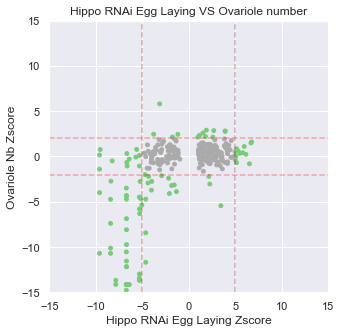

In [63]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X, Y, c=c, s=15)
plt.plot([-15,15],[2,2],'--', color='red', alpha=0.3)
plt.plot([-15,15],[-2,-2], '--' ,color='red', alpha=0.3)
plt.plot([5,5],[-15,15], '--' ,color='darkred', alpha=0.3)
plt.plot([-5,-5],[-15,15], '--' ,color='darkred', alpha=0.3)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('Hippo RNAi Egg Laying Zscore')
plt.ylabel('Ovariole Nb Zscore')
plt.title('Hippo RNAi Egg Laying VS Ovariole number')
fig.savefig(os.path.join(resultpath,"Figures/Scatter_Ova_VS_Fec.svg"))

## Hippo RNAi Ovariole nb VS Egg Laying

In [64]:
# Set X as Ovariole Number
X = mean_xRNAi_gene[mean_xRNAi_gene['FbID'].isin(commongenes)]['Z'].values
# Set Y as Hippo RNAi EggLaying
Y = mean_ova_gene[mean_ova_gene['FbID'].isin(commongenes)]['Z'].values

In [65]:
# Let's create the color set Gray if under threshold, or blue if over threshold
c = []
for i in range(len(X)):
    tmpc = gray
    if np.abs(X[i]) >= eggl_threshold:
        tmpc = green
    if np.abs(Y[i]) >= ova_threshold:
        tmpc = green
    c.append(tmpc)

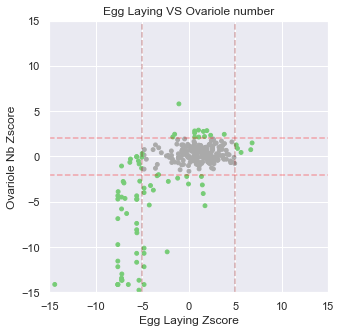

In [66]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X, Y, c=c, s=15)
plt.plot([-15,15],[2,2],'--', color='red', alpha=0.3)
plt.plot([-15,15],[-2,-2], '--' ,color='red', alpha=0.3)
plt.plot([5,5],[-15,15], '--' ,color='darkred', alpha=0.3)
plt.plot([-5,-5],[-15,15], '--' ,color='darkred', alpha=0.3)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('Egg Laying Zscore')
plt.ylabel('Ovariole Nb Zscore')
plt.title('Egg Laying VS Ovariole number')
fig.savefig(os.path.join(resultpath,"Figures/Scatter_Ova_VS_xRNAi.svg"))

## Hippo RNAi Egg Laying VS Egg Laying

In [67]:
# Set X as Ovariole Number
X = mean_fec_gene[mean_fec_gene['FbID'].isin(commongenes)]['Z'].values
# Set Y as Hippo RNAi EggLaying
Y = mean_xRNAi_gene[mean_xRNAi_gene['FbID'].isin(commongenes)]['Z'].values

In [68]:
# Let's create the color set Gray if under threshold, or blue if over threshold
c = []
for i in range(len(X)):
    tmpc = gray
    if np.abs(X[i]) >= eggl_threshold:
        tmpc = green
    if np.abs(Y[i]) >= eggl_threshold:
        tmpc = green
    c.append(tmpc)

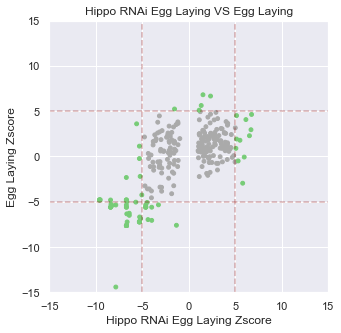

In [69]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X, Y, c=c, s=15)
plt.plot([-15,15],[5,5], '--', color='darkred', alpha=0.3)
plt.plot([-15,15],[-5,-5], '--', color='darkred', alpha=0.3)
plt.plot([5,5],[-15,15], '--', color='darkred', alpha=0.3)
plt.plot([-5,-5],[-15,15], '--', color='darkred', alpha=0.3)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('Hippo RNAi Egg Laying Zscore')
plt.ylabel('Egg Laying Zscore')
plt.title('Hippo RNAi Egg Laying VS Egg Laying')
fig.savefig(os.path.join(resultpath,"Figures/Scatter_Fec_VS_xRNAi.svg"))

# Correlation of Ovariole nb and Egg Laying

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


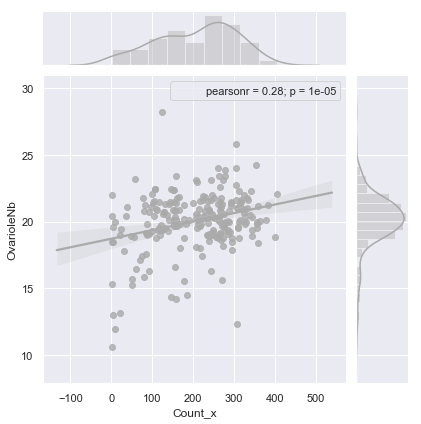

In [70]:
g = sns.jointplot(x="Count_x", y="OvarioleNb", color=gray, data=tmpdata[(tmpdata['Count_x'] > 0) & (tmpdata['OvarioleNb'] > 0)], kind="reg")
g = g.annotate(stats.pearsonr)
# sns.regplot(X,Y)
g.savefig(os.path.join(resultpath,"Figures/Regression_Ova_VS_Fec.svg"))

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


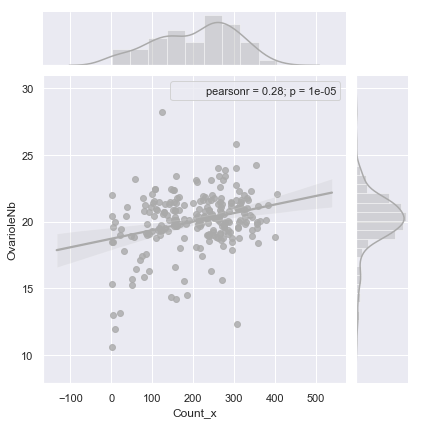

In [71]:
g = sns.jointplot(x="Count_x", y="OvarioleNb", color=gray, data=tmpdata[(tmpdata['Count_x'] > 0) & (tmpdata['OvarioleNb'] > 0)], kind="reg")
g = g.annotate(stats.pearsonr)
# sns.regplot(X,Y)
g.savefig(os.path.join(resultpath,"Figures/Regression_Ova_VS_Fec.svg"))

# Looking at the effects of the modules genes on each phenotype

In [73]:
all_modules = [list(core_module), list(ova_module), list(fec_module), list(xRNAi_module)]
all_modules_G = [core_module_G, ova_module_G, fec_module_G, xRNAi_module_G]
module_name = ['Core Module', 'HpoRNAi Ova', 'HpoRNAi EggL', 'EggL']

In [74]:
data = pd.DataFrame()

for module, G, name in zip(all_modules, all_modules_G, module_name):
    tmp = mean_fec_gene[mean_fec_gene['FbID'].isin(module)][['FbID','Z']]
    tmp = tmp.append(mean_xRNAi_gene[mean_xRNAi_gene['FbID'].isin(module)][['FbID','Z']])
    tmp = tmp.append(mean_ova_gene[mean_ova_gene['FbID'].isin(module)][['FbID','Z']])
    
    inscreen = []
    inscreen += ["Hippo RNAi EggLaying"]*len(mean_fec_gene[mean_fec_gene['FbID'].isin(module)])
    inscreen += ["EggLaying"]*len(mean_xRNAi_gene[mean_xRNAi_gene['FbID'].isin(module)])
    inscreen += ["Ovariole nb"]*len(mean_ova_gene[mean_ova_gene['FbID'].isin(module)])
    tmp['Screen'] = inscreen
    
    tmp['Seed'] = tmp['FbID'].apply(lambda node: 'Seed' if 'Seed' in G.nodes[node]['Seed'] else 'Connector')
    
    tmp['Module'] = [name]*len(tmp)
    data = data.append(tmp)
    
data = data.reset_index(drop=True)

## Drawing the different modules Z score values

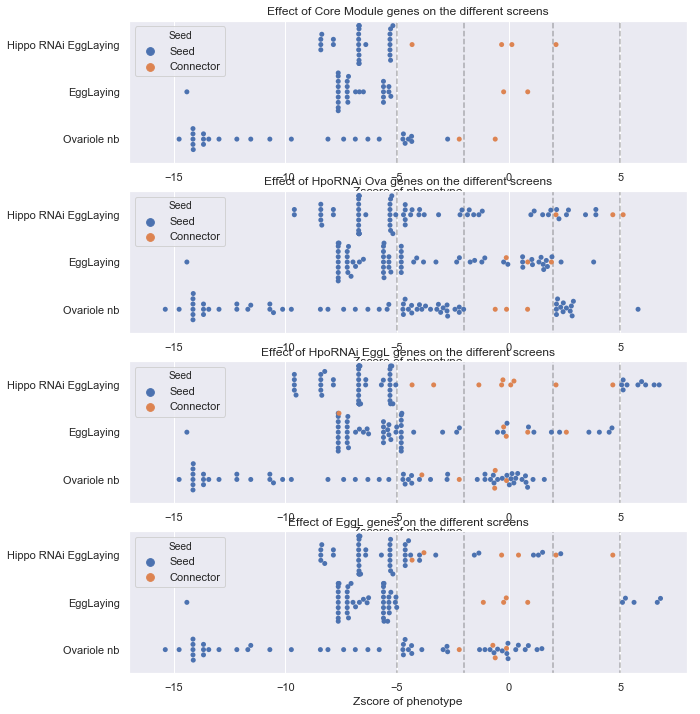

In [76]:
fig = plt.figure(figsize=(10,12))
i = 1
for module in module_name:
    ax = fig.add_subplot(4,1,i)
    sns.swarmplot(data=data[(data['Module'] == module)], y='Screen', x='Z', hue='Seed')    
    plt.plot([-2,-2],[-10,10], 'k--', alpha=0.3)
    plt.plot([-5,-5],[-10,10], 'k--', alpha=0.3)
    plt.plot([2,2],[-10,10], 'k--', alpha=0.3)
    plt.plot([5,5],[-10,10], 'k--', alpha=0.3)
    plt.ylabel("")
    plt.xlabel("Zscore of phenotype")
    plt.title("Effect of {} genes on the different screens".format(module))
    plt.xlim(-17,8)
    i += 1
fig.savefig(os.path.join(resultpath, "Figures/Zscores_allscreens.svg"))

# General Screen number reporting 

In [77]:
sns.set()

In [78]:
ova_negative = mean_ova_gene[mean_ova_gene['Z'] <= - ova_threshold].shape[0]
ova_positive = mean_ova_gene[mean_ova_gene['Z'] >= ova_threshold].shape[0]
ova_noeffect = mean_ova_gene.shape[0] - ova_negative - ova_positive
assert(ova_noeffect + ova_negative + ova_positive == len(mean_ova_gene))

In [79]:
fec_negative = mean_fec_gene[mean_fec_gene['Z'] <= - eggl_threshold].shape[0]
fec_positive = mean_fec_gene[mean_fec_gene['Z'] >= eggl_threshold].shape[0]
fec_noeffect = mean_fec_gene.shape[0] - fec_negative - fec_positive
fec_notfound = 12 # Genes not tested because RNAi line not existing
assert(fec_noeffect + fec_negative + fec_positive == len(mean_fec_gene))

In [80]:
xRNAi_negative = mean_xRNAi_gene[mean_xRNAi_gene['Z'] <= - eggl_threshold].shape[0]
xRNAi_positive = mean_xRNAi_gene[mean_xRNAi_gene['Z'] >= eggl_threshold].shape[0]
xRNAi_noeffect = mean_xRNAi_gene.shape[0] - xRNAi_negative - xRNAi_positive
assert(xRNAi_noeffect + xRNAi_negative + xRNAi_positive == len(mean_xRNAi_gene))

In [92]:
neg = np.array([fec_negative, xRNAi_negative, ova_negative])
pos = np.array([fec_positive, xRNAi_positive, ova_positive])
noef = np.array([fec_noeffect, xRNAi_noeffect-1, ova_noeffect-1]) # Removing -1 for the Control FbID
notf = np.array([fec_notfound, 0, 0])

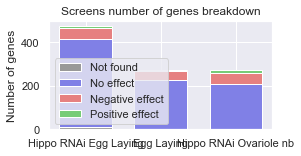

In [93]:
fig = plt.figure(figsize=(4,2))
width = 0.7
p1 = plt.bar(np.arange(3), notf, width, color=(0.6,0.6,0.6))
p2 = plt.bar(np.arange(3), noef, width, color=(0.5,0.5,0.9), bottom=notf)
p3 = plt.bar(np.arange(3), neg, width,  color=(0.9,0.5,0.5), bottom=notf+noef)
p4 = plt.bar(np.arange(3), pos, width,  color=green, bottom=notf+noef+neg)

plt.ylabel('Number of genes')
plt.title('Screens number of genes breakdown')
plt.xticks(np.arange(3), ('Hippo RNAi Egg Laying', 'Egg Laying', 'Hippo RNAi Ovariole nb'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Not found', 'No effect', 'Negative effect', 'Positive effect'))
fig.savefig(os.path.join(resultpath, "Figures/ScreenNumber_Breakdown.svg"))

## Make Table

In [94]:
table = np.array([notf, noef, neg, pos, neg+pos+noef+notf])
rows = ['Not found', 'No effect', 'Negative effect', 'Positive effect', 'Total']
columns = ['Hippo RNAi Egg Laying', 'Egg Laying', 'Hippo RNAi Ovariole nb']

In [95]:
colors = [(0.6,0.6,0.6), (0.5,0.5,0.9), (0.9,0.5,0.5), green, (1,1,1)]

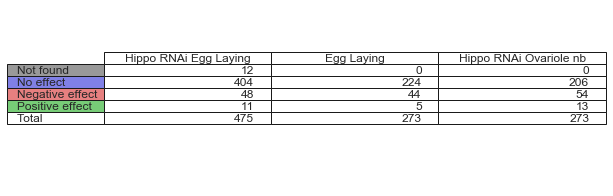

In [96]:
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='center')
fig.savefig(os.path.join(resultpath, "Figures/Table_ScreenNumber_Breakdown.svg"))

# Hippo RNAi Effect

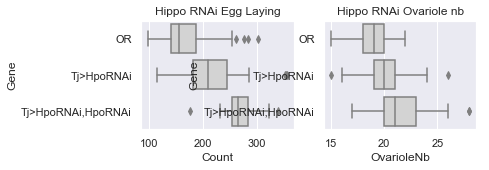

In [97]:
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(121)
sns.boxplot(data=hipo_fec[(hipo_fec['Condition'] == 'Sum')], x='Count', y="Gene", order=['OR', 'Tj>HpoRNAi', 'Tj>HpoRNAi,HpoRNAi'], color='lightgray')
plt.title("Hippo RNAi Egg Laying")
# fig.savefig(os.path.join(resultpath, 'Figures/HippoRNAiEffect_hpoEggL.svg'))

ax = fig.add_subplot(122)
# fig = plt.figure(figsize=(5,3))
sns.boxplot(data=hipo_ova, x='OvarioleNb', y="Gene", order=['OR', 'Tj>HpoRNAi', 'Tj>HpoRNAi,HpoRNAi'], color='lightgray')
plt.title("Hippo RNAi Ovariole nb")
fig.savefig(os.path.join(resultpath, 'Figures/HippoRNAiEffect.svg'))

# Batch effects

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


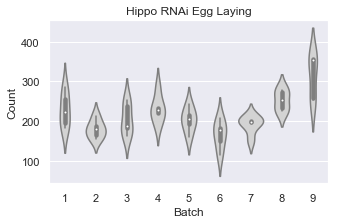

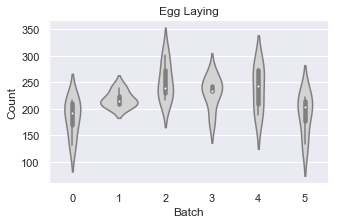

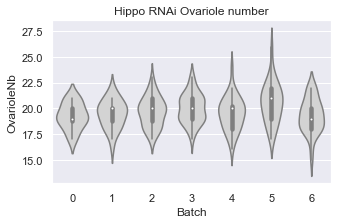

In [98]:
fig = plt.figure(figsize=(5,3))
sns.violinplot(data=hipo_fec[(hipo_fec['Condition'] == 'Sum') & (hipo_fec['Gene'] == 'Tj>HpoRNAi')], x='Batch', y="Count", color="lightgray")
plt.title("Hippo RNAi Egg Laying")
fig.savefig(os.path.join(resultpath, 'Figures/BatchEffect_hpoEggL.svg'))

fig = plt.figure(figsize=(5,3))
sns.violinplot(data=xRNAi_fec[(xRNAi_fec['Condition'] == 'Sum') & (xRNAi_fec['Gene'] == 'Tj>')], x='Batch', y="Count", color="lightgray")
plt.title("Egg Laying")
fig.savefig(os.path.join(resultpath, 'Figures/BatchEffect_EggL.svg'))

fig = plt.figure(figsize=(5,3))
sns.violinplot(data=hipo_ova[(hipo_ova['Gene'] == 'Tj>HpoRNAi')], x='Batch', y="OvarioleNb", color="lightgray")
plt.title("Hippo RNAi Ovariole number")
fig.savefig(os.path.join(resultpath, 'Figures/BatchEffect_hpoova.svg'))